In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
import random



In [82]:
df = pd.read_csv('mnist-1.csv')
df = df.iloc[:, 1:] #remove label



# PCA

Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data. Please also copy your code snippet here.


In [58]:
class pca:
    def __init__(self, x, n_components = None):
        self.x = x
        self.n_components = n_components
        self.num_features = x.shape[0]
        self.ori_feat = x.shape[1]
        self.cov_mat = None
        self.P = None
        self.y = None

    def cov(self):
        self.cov_mat = np.cov(self.x.T)
        return self.cov_mat
    def standardization(self):
        return self.x - np.mean(self.x, axis=0)
    def reduce_feature(self):
        x_meaned = self.standardization()
        x_cov = self.cov()
        eigen_val, eigen_vec = np.linalg.eig(x_cov)
        sort_index = np.argsort(eigen_val[::-1]) #Use np.argsort()

        sorted_eigenval = eigen_val[sort_index]
        sorted_eigenvector = eigen_vec[:,sort_index]

        self.P = sorted_eigenvector[:,:self.n_components]
        self.y = np.dot(self.P.T, x_meaned.T).T
        return self.y

pca_1 = pca(df, 10)
new_df = pca_1.reduce_feature()
print(f'The input x has shape {df.shape}, and the transformed x has shape {new_df.shape}')
print(f'The sum of the input covariance matrix is {round(np.sum(pca_1.cov_mat), 5)}.')
print(f'The sum of the transformed covariance matrix is {round(np.sum(np.cov(new_df.T)).real, 5)}.')

The input x has shape (5999, 784), and the transformed x has shape (5999, 10)
The sum of the input covariance matrix is 1128.08743.
The sum of the transformed covariance matrix is 5.84584.


# K-Means

Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here.

In [90]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum(np.linalg.norm(x[clusters[i]] - cluster_center[i], axis=1) ** 2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history


clusters, cluster_center, loss = k_means(df, 10)
for i, c in enumerate(cluster_center):
    print(f'centroid {i}: {np.sum(c)}')






centroid 0: 118.63318207282931
centroid 1: 69.72717806608733
centroid 2: 140.1534791533942
centroid 3: 97.0409806122226
centroid 4: 112.71649023245675
centroid 5: 143.7366610997712
centroid 6: 66.66850490196087
centroid 7: 118.41863075196426
centroid 8: 127.30996808025546
centroid 9: 97.19438261791223


In [89]:
print(clusters[1])

print(df.values[clusters[3]].shape)

[2, 22, 28, 58, 60, 66, 76, 77, 98, 104, 112, 136, 140, 162, 167, 176, 200, 204, 255, 268, 289, 299, 308, 314, 317, 344, 350, 354, 356, 396, 409, 415, 442, 446, 454, 465, 474, 490, 491, 506, 507, 509, 510, 532, 534, 537, 552, 559, 572, 582, 586, 587, 592, 608, 610, 636, 640, 643, 645, 647, 660, 670, 690, 695, 697, 710, 746, 764, 778, 782, 808, 820, 832, 834, 870, 883, 890, 904, 917, 918, 934, 937, 940, 947, 950, 958, 960, 992, 1002, 1012, 1016, 1030, 1043, 1050, 1064, 1068, 1073, 1078, 1079, 1080, 1084, 1094, 1105, 1114, 1116, 1122, 1130, 1154, 1180, 1196, 1210, 1245, 1258, 1276, 1286, 1320, 1330, 1364, 1368, 1374, 1404, 1410, 1424, 1444, 1454, 1460, 1462, 1472, 1476, 1482, 1495, 1496, 1520, 1526, 1534, 1544, 1578, 1596, 1600, 1626, 1646, 1657, 1664, 1679, 1680, 1696, 1698, 1702, 1716, 1733, 1734, 1757, 1786, 1806, 1814, 1830, 1845, 1858, 1859, 1908, 1914, 1976, 1988, 2017, 2038, 2044, 2046, 2069, 2082, 2085, 2107, 2109, 2121, 2122, 2131, 2158, 2165, 2176, 2300, 2334, 2345, 2354, 2373,

# visualization

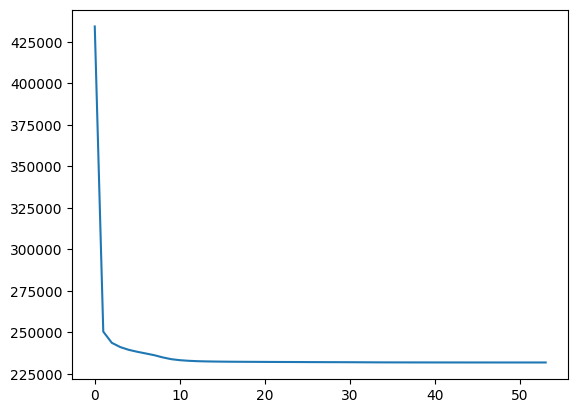

In [91]:
def plot(x, k, clusters:list, loss=[]):
    f1 = plt.figure()
    ax1 = f1.add_subplot(111)

    for i in range(k):
        ax1.scatter(x[clusters[i],0],x[clusters[i],1])

    if loss:
        f2 = plt.figure()
        ax2 = f2.add_subplot(111)
        ax2.plot([i for i in range(len(loss))], loss)
        ax2.set_title('Epochs vs Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
    plt.show()

plt.plot(loss)

# find optimal k

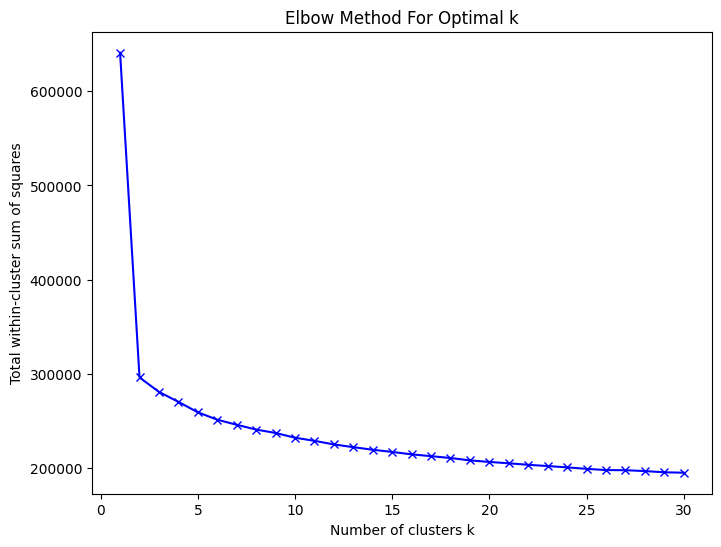

In [101]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum(np.linalg.norm(x[clusters[i]] - cluster_center[i], axis=1) ** 2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history




def elbow_method(x, k_max=30, epochs=600):
    loss_list = []
    K = range(1, k_max + 1)
    for k in K:
        clusters, cluster_center, loss_history = k_means(x, k=k, epochs=epochs)
        # Get the final loss (total within-cluster sum of squares)
        final_loss = loss_history[-1]
        loss_list.append(final_loss)
    # Plotting the elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(K, loss_list, 'bx-')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Total within-cluster sum of squares')
    plt.title('Elbow Method For Optimal k')
    plt.show()

elbow_method(df)


# OWwn write

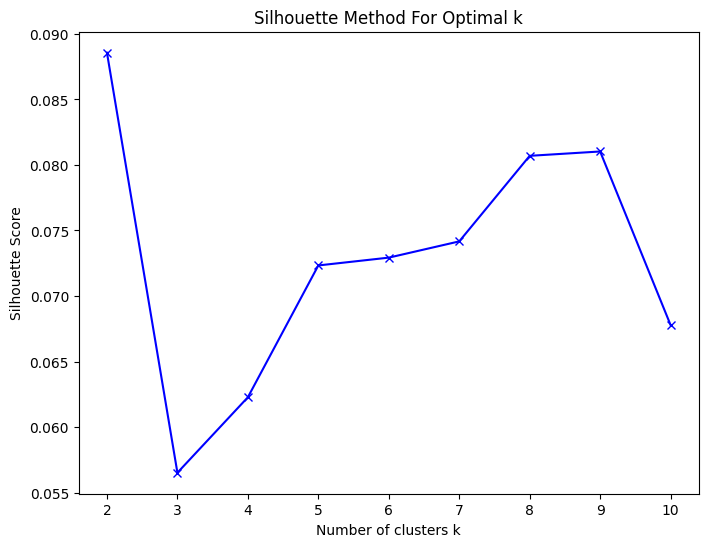

In [104]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum(np.linalg.norm(x[clusters[i]] - cluster_center[i], axis=1) ** 2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history



def silhouette_method(x, k_max=50, epochs=600):
    silhouette_scores = []
    K = range(2, k_max + 1)  # Silhouette score is undefined for k=1
    for k in K:
        clusters, cluster_center, loss_history = k_means(x, k=k, epochs=epochs)
        # Create labels array for silhouette_score
        labels = np.zeros(len(x), dtype=int)
        for cluster_idx, cluster_points in enumerate(clusters):
            labels[cluster_points] = cluster_idx
        # Compute silhouette score
        score = silhouette_score(x.values, labels)
        silhouette_scores.append(score)
    # Plotting the silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method For Optimal k')
    plt.show()

silhouette_method(df, 10)

In [ ]:
plt.plot(result_arr)

# second implement


In [188]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    x = x.values
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        loss_history.append(loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history

loss_arr = []

for k in range(2, 30):
  clusters, cluster_center, loss_history = k_means(df, k)
  loss_arr.append(np.mean(loss_history))


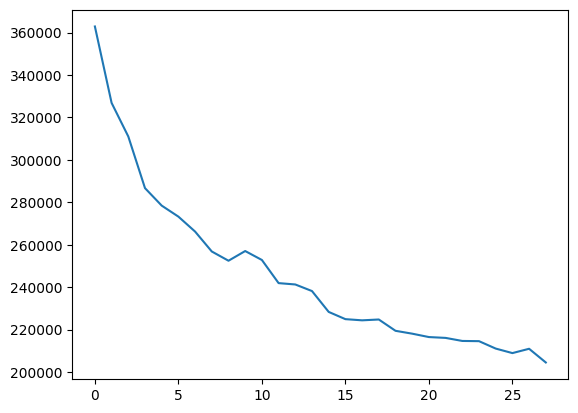

In [189]:
plt.plot(loss_arr)

# second implement test 2
this one is correct

In [95]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):

            return clusters, new_clusters_center

        # d. update the centroid

        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center

def find_best_k (training_set, validation_set):
    result_lose_arr = []
    result = 9999999999999999
    result_index = 0

    for k in range(2, 50):
        clusters, cluster_center = k_means(training_set, k)
        
        validation_cluster = []
        for i in range(k):
            validation_cluster.append([])

        for i in range(validation_set.shape[0]):
            xi = validation_set[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            validation_cluster[c].append(i) # Append this datapoint to this cluster

        validation_loss = 0
        for i in range(k):
            if len(validation_cluster[i]) > 0:
                validation_loss += np.sum(np.linalg.norm(validation_set[validation_cluster[i]] - cluster_center[i], axis=1) ** 2)
        result_lose_arr.append(validation_loss)

    for i in range(len(result_lose_arr)):
        if result_lose_arr[i] < result:
            result = result_lose_arr[i]
            result_index = i


    return result_lose_arr, result, result_index


train = df.iloc[:4000].values
val = df.iloc[4000:].values
result_lose_arr, result, result_index = find_best_k (train, val)



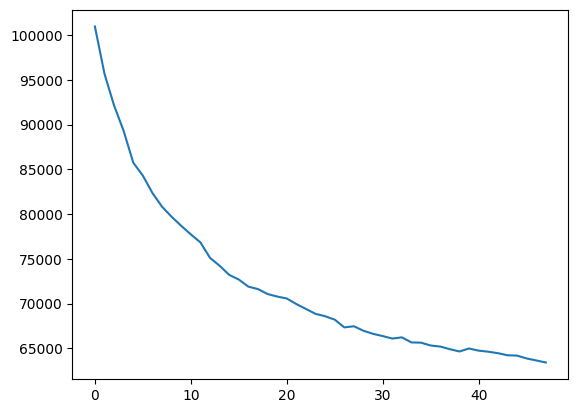

In [96]:
plt.plot(result_lose_arr)

#### Use the Elbow method we can see the elbow plot is at k = 11.

#### Therefore, we can claim that the optimal k is k = 11.

In [97]:
from sklearn.metrics import silhouette_score

def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):

            return clusters, new_clusters_center

        # d. update the centroid

        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center

def find_best_k (training_set, validation_set):
    result_arr = []
    for k in range(2, 50):
        cluster_arr = []
        clusters, cluster_center = k_means(training_set, k)
        
        validation_cluster = []
        for i in range(k):
            validation_cluster.append([])

        for i in range(validation_set.shape[0]):
            xi = validation_set[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            validation_cluster[c].append(i) # Append this datapoint to this cluster
            cluster_arr.append(c)

        result_arr.append(silhouette_score(validation_set, cluster_arr, metric = 'euclidean'))
                
                
    return result_arr, cluster_arr







train = df.iloc[:4000].values
val = df.iloc[4000:].values
result_arr, cluster_arr = find_best_k (train, val)

In [30]:
print(cluster_arr)
print(len(cluster_arr))
print(result_arr)

[6, 17, 22, 11, 1, 16, 10, 14, 14, 3, 6, 3, 23, 3, 10, 13, 10, 5, 18, 9, 26, 6, 17, 0, 16, 21, 14, 13, 23, 19, 25, 21, 1, 0, 27, 28, 10, 19, 8, 28, 9, 0, 26, 14, 18, 9, 14, 10, 23, 21, 12, 28, 1, 8, 27, 21, 24, 19, 7, 21, 9, 11, 26, 3, 18, 13, 14, 20, 23, 22, 12, 5, 1, 2, 27, 11, 24, 5, 7, 13, 9, 17, 26, 28, 18, 13, 5, 15, 23, 5, 18, 16, 21, 1, 21, 13, 15, 21, 27, 28, 1, 4, 26, 20, 23, 17, 27, 14, 23, 5, 3, 7, 15, 19, 14, 0, 18, 21, 10, 22, 6, 18, 14, 21, 27, 10, 21, 3, 23, 0, 0, 4, 27, 11, 15, 6, 23, 20, 26, 22, 0, 25, 7, 13, 14, 20, 26, 16, 23, 5, 26, 22, 20, 20, 5, 11, 12, 21, 14, 3, 18, 3, 23, 2, 23, 22, 24, 10, 27, 19, 10, 15, 9, 4, 2, 28, 10, 27, 1, 15, 14, 22, 25, 20, 27, 22, 12, 19, 2, 23, 1, 24, 23, 24, 27, 6, 27, 5, 1, 16, 14, 3, 17, 13, 24, 21, 0, 13, 16, 8, 9, 3, 26, 19, 26, 17, 2, 17, 21, 14, 7, 21, 1, 20, 23, 9, 9, 4, 18, 13, 5, 19, 6, 6, 1, 6, 23, 6, 14, 4, 25, 2, 8, 21, 17, 20, 24, 3, 5, 6, 5, 4, 26, 9, 0, 11, 1, 16, 24, 21, 26, 1, 13, 20, 14, 2, 23, 5, 12, 17, 1, 28, 0

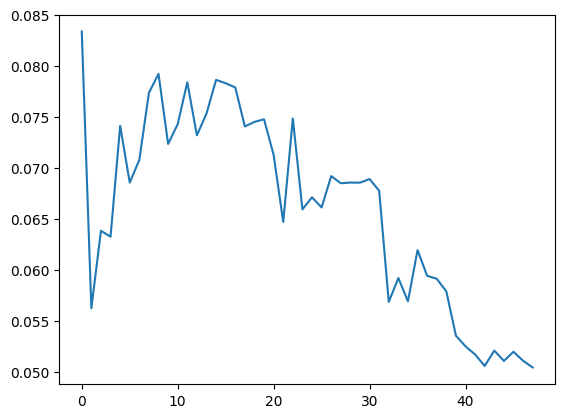

In [98]:
plt.plot(result_arr)


# kernel k-means algorithm with RBF-kernel

Please only use the first 500 samples and cluster the them into 5 groups. This is for reducing the running time of your code. 

Please copy your code snippet here.

TIPS: If you can use matrix operations to replace summations, your code will be more efficient. However, this is just optional.

In [69]:
def k_means(x, k = 2 , epochs = 600):
    # 1. Randomly initialize k centroids
    np.random.seed(2024)
    clusters = []
    
    loss_history = []

    # ==============================================================
    # "you need to randomly initialize k centroids using x"
    cluster_center = x[np.random.choice(x.shape[0], k, replace=False)]
    # ==============================================================

    for i in range(k):
        clusters.append([])
    
    # 2. Training
    for _ in range(epochs):
        new_clusters_center = np.zeros((k, x.shape[1]))
        for i in range(k):
            clusters[i]=[]

        ## a. E-step: finding points to the nearest centroid, assigning to corresponding clusters
        ## Calculate the distance from all points to the k cluster centers
        for i in range(x.shape[0]):
            xi = x[i]

            # ==============================================================
            # "Calculate the distance of xi with each centroid using norm2"
            distances = np.linalg.norm(xi - cluster_center, ord = 2, axis=1)

            # Assign points to the closest cluster
            # "Find out the nearest centroid to xi"
            # Returns the index of the nearest centriod to this datapoint
            c = np.argmin(distances)

            # ==============================================================
            clusters[c].append(i) # Append this datapoint to this cluster

        ## b. M-step: recalculate the location of the centroid using the mean of the clusters
        for i in range(k):
            # ==============================================================
            # "You need to calculate the position of the new centroids"
            if len(clusters[i]) == 0:
                new_clusters_center[i] = x[np.random.choice(x.shape[0], replace=False)]
            else:
                new_clusters_center[i] = np.sum(x[clusters[i]],axis=0) / len(clusters[i])

            # ==============================================================

        # c. If the centroid did not change, the algorithm should be stopped, otherwise continue.
        if np.all(new_clusters_center == cluster_center):
            return clusters, new_clusters_center, loss_history

        # d. update the centroid
        current_loss = 0
        for i in range(k):
            if len(clusters[i]) > 0:
                current_loss += np.sum((x[clusters[i]] - cluster_center[i])**2)
        loss_history.append(current_loss)
        # ==============================================================
        cluster_center = new_clusters_center

        # ==============================================================
    return clusters, cluster_center, loss_history


def cal_RBF(x):
    ## implement RBF method
    n = x.shape[0]
    # ==============================================================
    # "You need to initialize k"
    kernel_x = np.zeros((n,n))

    # ==============================================================
    sigma = 0

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement sigma here"
            sigma += np.linalg.norm(x[i] - x[j]) ** 2

            # ==============================================================
    sigma = 2 * sigma/(n**2)
    # gamma = 1/(2*sigma)

    for i in range(n):
        for j in range(n):
            # ==============================================================
            # "You need to implement kernel x here"
            kernel_x[i, j] = np.exp(-(np.linalg.norm(x[i]-x[j]))**2/sigma)
            #kernel_x[i, j] = np.exp(-gamma * np.linalg.norm(x[i]-x[j]))**2)

            # ==============================================================
    #kernel_x = k
    return kernel_x

kernel_x = cal_RBF(df[:500].values)
clusters, cluster_center, loss = k_means(kernel_x, 5)

for i, c in enumerate(cluster_center):
    print(f'centroid {i}: {np.sum(c)}')


centroid 0: 285.9141928207985
centroid 1: 321.935780798391
centroid 2: 326.1115875087804
centroid 3: 254.26134691094742
centroid 4: 308.3488201843429
